In [1]:
#importing libraries
from os import path
from keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import seaborn as sns

In [2]:
#pre-processing csv file
def preprocessing(filepath):
    file=pd.read_csv(filepath)
    file=file.sample(frac=1)#shuffling the dataset
    label=file.Class.tolist()
    encoder = LabelEncoder()
    label1 = encoder.fit_transform(label)#encoding the string attribute of classes to numbers
    file=file.drop(columns=['filename'])
    file=file.drop(columns=['Class'])
    file=file.to_numpy()
    file=np.reshape(file,(file.shape[0],file.shape[1],1))
    for i in range(100):
        print(label[i],"------>", label1[i])
    return file , label1 #the final file along with the label

In [3]:
instrument,label_instrument=preprocessing('/home/karrthik/Projects/dnn/csv/carnatic_train.csv')

Sitar ------> 5
violin ------> 8
Sarangi ------> 2
Shehnai ------> 4
Sitar ------> 5
Santoor ------> 1
Bansuri ------> 0
violin ------> 8
flute ------> 6
Sarod ------> 3
violin ------> 8
Sarod ------> 3
Sarod ------> 3
Sarangi ------> 2
Sitar ------> 5
violin ------> 8
Shehnai ------> 4
Sarangi ------> 2
Sarod ------> 3
Santoor ------> 1
violin ------> 8
Santoor ------> 1
Sarod ------> 3
Sarod ------> 3
flute ------> 6
violin ------> 8
violin ------> 8
Shehnai ------> 4
violin ------> 8
Shehnai ------> 4
Santoor ------> 1
Bansuri ------> 0
Sitar ------> 5
veena ------> 7
Bansuri ------> 0
Sitar ------> 5
Santoor ------> 1
Bansuri ------> 0
violin ------> 8
violin ------> 8
Bansuri ------> 0
Shehnai ------> 4
violin ------> 8
violin ------> 8
violin ------> 8
veena ------> 7
Bansuri ------> 0
Sitar ------> 5
Sarangi ------> 2
Sarod ------> 3
Sitar ------> 5
flute ------> 6
Sarangi ------> 2
Sarangi ------> 2
Sitar ------> 5
veena ------> 7
Sarod ------> 3
veena ------> 7
violin ------> 

In [4]:
#defining the dnn network
def rnn(file,label):
    mod1=Sequential()    #for shape and size of input layer based on number of columns
    mod1.add(LSTM(560,return_sequences=True,input_shape=(26,1)))
    mod1.add(LSTM(300,return_sequences=True))
    mod1.add(LSTM(200,return_sequences=True))
    mod1.add(LSTM(100))
    mod1.add(Dense(9, activation='softmax'))
    mod1.summary()
    mod1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history=mod1.fit(file,label,validation_split=0.4, epochs=100)
    return mod1,history

In [5]:
model_instrument, history_r=rnn(raga,label_raga)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 26, 560)           1258880   
_________________________________________________________________
lstm_1 (LSTM)                (None, 26, 300)           1033200   
_________________________________________________________________
lstm_2 (LSTM)                (None, 26, 200)           400800    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense (Dense)                (None, 9)                 909       
Total params: 2,814,189
Trainable params: 2,814,189
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
119/119 [==============================] - 122s 921ms/step - loss: 1.8346 - accuracy: 0.3510 - val_l

119/119 [==============================] - 84s 705ms/step - loss: 0.0177 - accuracy: 0.9897 - val_loss: 0.1913 - val_accuracy: 0.9483
Epoch 51/100
119/119 [==============================] - 87s 734ms/step - loss: 0.0233 - accuracy: 0.9861 - val_loss: 0.1960 - val_accuracy: 0.9479
Epoch 52/100
119/119 [==============================] - 84s 710ms/step - loss: 0.0156 - accuracy: 0.9911 - val_loss: 0.1963 - val_accuracy: 0.9476
Epoch 53/100
119/119 [==============================] - 75s 632ms/step - loss: 0.0132 - accuracy: 0.9931 - val_loss: 0.1943 - val_accuracy: 0.9487
Epoch 54/100
119/119 [==============================] - 57s 484ms/step - loss: 0.0167 - accuracy: 0.9888 - val_loss: 0.2035 - val_accuracy: 0.9479
Epoch 55/100
119/119 [==============================] - 53s 450ms/step - loss: 0.0184 - accuracy: 0.9872 - val_loss: 0.2005 - val_accuracy: 0.9476
Epoch 56/100
119/119 [==============================] - 52s 439ms/step - loss: 0.0165 - accuracy: 0.9899 - val_loss: 0.2095 - val_a

In [ ]:
#model_raga=loaded_model
df=pd.read_csv('/home/green/Projects/dnn/csv/carnatic_trial.csv')
file = df.copy()
#file=file.drop(columns=['filename'])
#file=file.drop(columns=['raga'])
file=file.to_numpy()
test1=np.reshape(file,(file.shape[0],file.shape[1],1))
y_prediction=np.argmax(model_instrument.predict(test1), axis=-1)
y_prediction

In [ ]:
history=model_instrument.fit(raga,label_raga,validation_split=0.4, epochs=1)

In [ ]:
#saving the model as a json file with weights in h5 format
model_json = model_raga.to_json()
with open("/home/green/Projects/dnn/model/rnn_instrument.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_raga.save_weights("/home/green/Projects/dnn/model/rnn_instrument.h5")
print("Saved model to disk")

In [3]:
#loading the file
json_file = open("/home/green/Projects/dnn/model/rnn_instrument.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/home/green/Projects/dnn/model/rnn_instrument.h5")
print("Loaded model from disk")
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

FileNotFoundError: [Errno 2] No such file or directory: '/home/green/Projects/dnn/model/rnn_instrument.json'

In [ ]:
for i in y_prediction:
    if i//1==0:
        print('Purvikalyani')
    if i//1==1:
        print('bahudari')
    if i//1==2:
        print('bauli')
    if i//1==3:
        print('behag')
    if i//1==4:
        print('brindavana saranga')
    if i//1==5:
        print('gambhira nata')
    if i//1==6:
        print('hamsadhvani')
    if i//1==7:
        print('kalyani')
    if i//1==8:
        print('kapi')
    if i//1==9:
        print('madyamavati')
    if i//1==10:
        print('natakurinji')
    if i//1==11:
        print('ragamalika ')
    if i//1==12:
        print('riti gaula')
    if i//1==13:
        print('saramathi ')
    if i//1==14:
        print('sindhubhairavi ')
    if i//1==15:
        print('yamuna kalyani')

In [7]:
y_prediction_raga=np.argmax(model_instrument.predict(raga), axis=-1)
y_prediction_raga
C=confusion_matrix(label_raga, y_prediction_raga)
K=((C / C.astype(np.float).sum(axis=1))*100)
for i in range (9):
    print(K[i][i])

92.85714285714286
98.41986455981942
93.77162629757785
92.87128712871288
91.33663366336634
96.86028257456829
91.23867069486404
98.69888475836431
94.26540284360189


<AxesSubplot:>

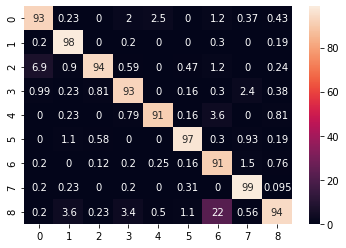

In [8]:
sns.heatmap(K, annot=True)

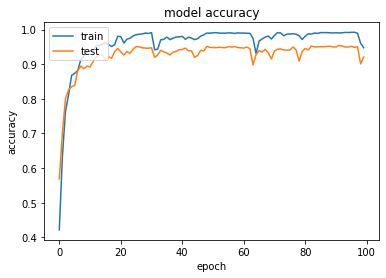

In [9]:
plt.plot(history_r.history['accuracy'])
plt.plot(history_r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

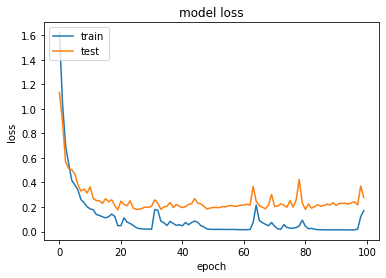

In [10]:
plt.plot(history_r.history['loss'])
plt.plot(history_r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
c=history_r.history['val_loss']


In [36]:
c=[1.1344012022018433,
 0.8973590135574341,
 0.5685837268829346,
 0.5134940147399902,
 0.504121720790863,
 0.4702170491218567,
 0.38382378220558167,
 0.3302382230758667,
 0.3455432057380676,
 0.3142167329788208,
 0.3646876811981201,
 0.2694638669490814,
 0.25252899527549744,
 0.25097501277923584,
 0.22946032881736755,
 0.20807084679603577,
 0.19273908138275146,
 0.187762773036957,
 0.1833425921201706,
 0.17673145234584808,
 0.1577131485939026,
 0.16217540591955185,
 0.1602232277393341,
 0.1512974441051483,
 0.1217266547679901,
 0.12046487867832184,
 0.12169136345386505,
 0.1298302435874939,
 0.112000880390405655,
 0.10718031585216522,
 0.12081771045923233,
 0.11816217064857483,
 0.123072485625743866,
 0.110763378739357,
 0.100163634419441223,
 0.120660142600536346,
 0.13681460320949554,
 0.1267458575963974,
 0.122017399966716766,
 0.120532488822937012,
 0.11555330276489258,
 0.120250526070594788,
 0.12125554084777832,
 0.12726577520370483,
 0.1196834206581116,
 0.10195484280586243,
 0.12519166767597198,
 0.0910529109239578247,
 0.0918257611989974976,
 0.0919132618606090546,
 0.0919601701200008392,
 0.0919629746675491333,
 0.0819434477388858795,
 0.0812034960240125656,
 0.08120054598152637482,
 0.08120952796936035156,
 0.08121267008781433105,
 0.08120493246614933014,
 0.09120927676558494568,
 0.09121388714015483856,
 0.09121729952096939087,
 0.09122170871496200562,
 0.09121527744829654694,
 0.091468691623210907,
 0.09124634400010108948,
 0.0813194525063037872,
 0.081491296112537384,
 0.0814578599393367767,
 0.0814438606083393097,
 0.08130282822251319885,
 0.08120465917885303497,
 0.08120668251812458038,
 0.08122678883373737335,
 0.08121557053923606873,
 0.0813471336221694946,
 0.0713144270062446594,
 0.07120013105869293213,
 0.071570451498031616,
 0.0712487064003944397,
 0.07123336274921894073,
 0.0711079842627048492,
 0.06122532348334789276,
 0.05019651412963867,
 0.040321886241436005,
 0.02881796419620514,
 0.010628035068511963,
 0.009212724968791008,
 0.00822293612360954285,
 0.00721641913056373596,
 0.0063447813093662262,
 0.0061273259818553925,
 0.0062882065176963806,
 0.0053112738132476807,
 0.0042946764528751373,
 0.00323882794380188,
 0.002355506271123886,
 0.0024252554774284363,
 0.0021660970151424408,
 0.003706604838371277,
 0.00277810662984848]

In [20]:
a=[0.421509325504303,
 0.6323955059051514,
 0.7628188133239746,
 0.8104128241539001,
 0.8674730658531189,
 0.8732579350471497,
 0.8816723823547363,
 0.9129634499549866,
 0.9224296808242798,
 0.9342623949050903,
 0.938206672668457,
 0.938206672668457,
 0.9524059891700745,
 0.9547725319862366,
 0.9574020504951477,
 0.9608203768730164,
 0.9566131830215454,
 0.9510912299156189,
 0.9563502669334412,
 0.980278730392456,
 0.9794898629188538,
 0.9610833525657654,
 0.9721272587776184,
 0.9747567772865295,
 0.9813305139541626,
 0.9850118160247803,
 0.9863265752792358,
 0.9871154427528381,
 0.9897449612617493,
 0.988693118095398,
 0.9910596609115601,
 0.9416250586509705,
 0.9432027339935303,
 0.9502866077423096,
 0.9516013669967651,
 0.9481751036643982,
 0.9308124995231628,
 0.9450196933746338,
 0.9484380793571472,
 0.9387010550498962,
 0.920278730392456,
 0.9418643426895142,
 0.957912187576294,
 0.9552826690673828,
 0.9608124995231628,
 0.953442018032074,
 0.9508046221733093,
 0.954748899936676,
 0.9597449612617493,
 0.9594819855690002,
 0.9502708530426025,
 0.9510596609115601,
 0.9594819855690002,
 0.9594819855690002,
 0.9592190098762512,
 0.9502708530426025,
 0.9500078773498535,
 0.958693118095398,
 0.9502708530426025,
 0.9597449612617493,
 0.9597449612617493,
 0.9692190098762512,
 0.968956093788147,
 0.9747567772865295,
 0.9605810928344727,
 0.9668682813644409,
 0.9526531505584717,
 0.9581751036643982,
 0.9508046221733093,
 0.9426531505584717,
 0.9429082489013672,
 0.9310596609115601,
 0.9300078773498535,
 0.9418564057350159,
 0.9465895509719849,
 0.9468524670600891,
 0.9579043102264404,
 0.9463265752792358,
 0.9421193814277649,
 0.9510754752159119,
 0.9408046221733093,
 0.9376413345336914,
 0.9368524670600891,
 0.9497449612617493,
 0.948693118095398,
 0.9510596609115601,
 0.9510596609115601,
 0.9610596609115601,
 0.9405337691307068,
 0.9400078773498535,
 0.9505337691307068,
 0.9400078773498535,
 0.9305337691307068,
 0.9415856122970581,
 0.9513226366043091,
 0.9618485283851624,
 0.9621115040779114,
 0.9692190098762512,
 0.9605574607849121,
 0.9674099278450012]

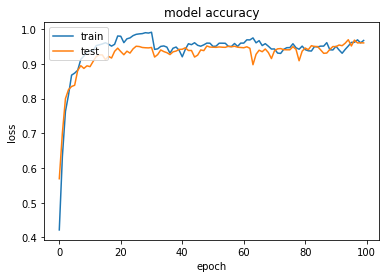

In [46]:
plt.plot(a)
plt.plot(b)
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
d=history_r.history['loss']

In [44]:
d=[1.6251827478408813,
 1.0479708909988403,
 0.7001164555549622,
 0.555008053779602,
 0.41813498735427856,
 0.38095512986183167,
 0.34063321352005005,
 0.260964572429657,
 0.23584528267383575,
 0.20206931233406067,
 0.18418239057064056,
 0.1772794872522354,
 0.1393066644668579,
 0.13157175481319427,
 0.11992829293012619,
 0.11174345016479492,
 0.1205054447054863,
 0.14205023646354675,
 0.12334411591291428,
 0.04763173684477806,
 0.047464895993471146,
 0.05181586980819702,
 0.0565271931886673,
 0.05611315160989761,
 0.049414850771427155,
 0.04213789314031601,
 0.033670054972171783,
 0.031707089617848396,
 0.039872596487402916,
 0.030072773098945618,
 0.038332678824663162,
 0.027939583957195282,
 0.03357586324214935,
 0.058526979386806488,
 0.06027770578861237,
 0.05934980347752571,
 0.07236339688301086,
 0.06660092622041702,
 0.04992201179265976,
 0.05590809881687164,
 0.04632428288459778,
 0.07355733960866928,
 0.055243540555238724,
 0.0732559934258461,
 0.08534380048513412,
 0.07536143064498901,
 0.0478709451854229,
 0.0381091870367527,
 0.02087831124663353,
 0.018176943063735962,
 0.01720556616783142,
 0.01766332983970642,
 0.017629684880375862,
 0.017163533717393875,
 0.01706750877201557,
 0.016891807317733765,
 0.016734786331653595,
 0.016698714345693588,
 0.015571482479572296,
 0.015767551958560944,
 0.014939281158149242,
 0.015087415464222431,
 0.016719182953238487,
 0.07172277569770813,
 0.051586133539676666,
 0.0603412327170372,
 0.07275522500276566,
 0.059280019253492355,
 0.047165922820568085,
 0.07322529703378677,
 0.04289010167121887,
 0.02245781011879444,
 0.03811538077890873,
 0.04637491121888161,
 0.033364713191986084,
 0.026978615671396255,
 0.027436312288045883,
 0.032101601362228394,
 0.03578001797199249,
 0.032551089823246,
 0.023522223830223083,
 0.02278929390013218,
 0.02596314065158367,
 0.019240759313106537,
 0.015078851953148842,
 0.014794541522860527,
 0.014370523393154144,
 0.013690231367945671,
 0.01396432239562273,
 0.013538865372538567,
 0.0014384333044290543,
 0.0013999875634908676,
 0.0014035262167453766,
 0.0013186710886657238,
 0.0013431310653686523,
 0.0013361889868974686,
 0.001368466392159462,
 0.0019570546224713326,
 0.002089990079402924,
 0.004011702060699463]

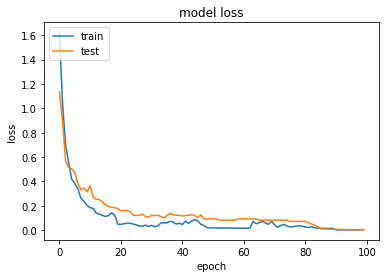

In [45]:
plt.plot(d)
plt.plot(c)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()